In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils.matplotlib_visualization_utils import plot_data1d_histogram, plot_densities
from ConfigParser import SafeConfigParser
from scipy.stats import binned_statistic
from matplotlib import gridspec

In [2]:
mpl_plot_config_fname = 'mpl_plot.cfg'

In [3]:
savefig_flag = True

In [4]:
parser = SafeConfigParser()
parser.read(mpl_plot_config_fname)

test_data_dir = parser.get('stacked', 'test_data_dir')
test_fin = parser.get('stacked', 'test_fin')

mpl_data_dir = parser.get('stacked', 'mpl_data_dir')

x_fin = parser.get('stacked', 'x_fin')
y_fin = parser.get('stacked', 'y_fin')

optimized_stacked_x_fout = parser.get('stacked', 'optimized_stacked_x_fout')
optimized_stacked_y_fout = parser.get('stacked', 'optimized_stacked_y_fout')
truth_stacked_x_fout = parser.get('stacked', 'truth_stacked_x_fout')
truth_stacked_y_fout = parser.get('stacked', 'truth_stacked_y_fout')
overlay_x_fout = parser.get('stacked', 'overlay_x_fout')
overlay_y_fout = parser.get('stacked', 'overlay_y_fout')

true_proportions = map(float, parser.get('stacked', 'true_proportions').split())
optimized_proportions = map(float, parser.get('stacked', 'optimized_proportions').split())

plot_truth_stack = bool(int(parser.get('stacked', 'plot_truth_stack')))
save_fig = bool(int(parser.get('stacked', 'save_fig')))


z1_min = float(parser.get('individual', 'z1_min'))
z1_max = float(parser.get('individual', 'z1_max'))
z2_min = float(parser.get('individual', 'z2_min'))
z2_max = float(parser.get('individual', 'z2_max'))

In [5]:
true_proportions

[0.00804293529, 0.01285358302, 0.12468482072, 0.42677501801, 0.427643642953]

In [6]:
optimized_proportions = [0.0229, -0.0016, 0.0992, 0.4346, 0.4449] #unconstrained
#optimized_proportions = [0.0206, 0.0, 0.1027, 0.4316, 0.445] #constrained
#optimized_proportions = [-0.034229, -0.130543, 0.599992, 0.150180, 0.414599] #restricted

In [7]:
test_data = np.genfromtxt(test_data_dir + '/' + test_fin)

In [8]:
stack_x = np.genfromtxt(mpl_data_dir + '/' + x_fin)
stack_y = np.genfromtxt(mpl_data_dir + '/' + y_fin)

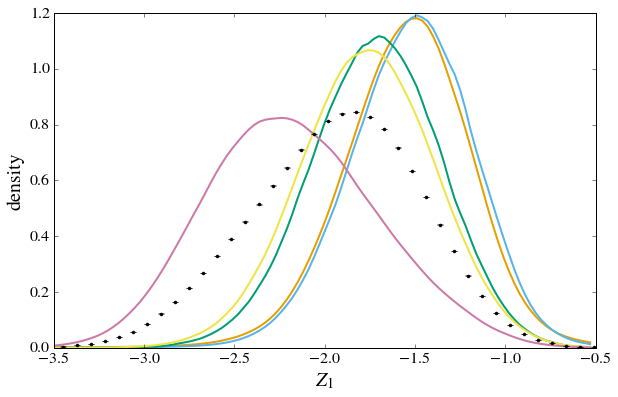

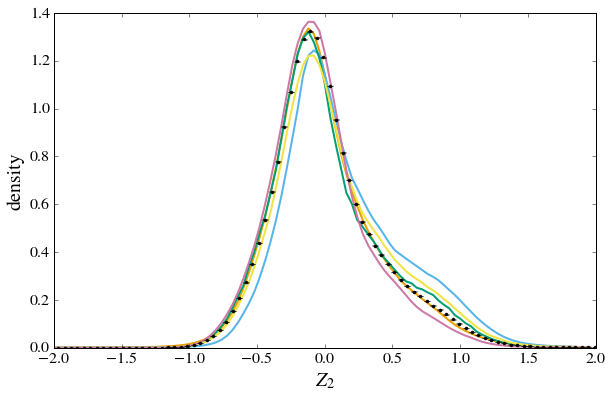

In [9]:
fig = plt.figure(figsize=(6*1.618,6))
ax = fig.add_subplot(1,1,1)
plot_densities(stack_x, stacked=False, ax=ax, xlabel=r'$Z_1$')
plot_data1d_histogram(test_data[:,0], weights=test_data[:,2], bins=100,normed=True, ax=ax, xlabel=r'$Z_1$');
ax.set_xlim(z1_min, z1_max)
ax.set_ylim(0)
if save_fig: fig.savefig(overlay_x_fout)

fig = plt.figure(figsize=(6*1.618,6))
ax = fig.add_subplot(1,1,1)
plot_densities(stack_y, stacked=False, ax=ax, xlabel=r'$Z_2$')
plot_data1d_histogram(test_data[:,1], weights=test_data[:,2], bins=300,normed=True, ax=ax, xlabel=r'$Z_2$');
ax.set_xlim(z2_min, z2_max)
ax.set_ylim(0)
if save_fig: fig.savefig(overlay_y_fout)

In [10]:
def plot_residuals(data, weights, range, fit, proportions, title, x_label, dataset, fname=None):
    fsize = 18
    fig = plt.figure(figsize=(8*1.618,8))
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    ax = fig.add_subplot(gs[0])
    ax.set_title(title, fontsize=fsize)
    
    step = 0.5*(fit[1,0] - fit[0,0])
    data_bin_counts, bin_edges = np.histogram(data, bins=100, weights=weights,
                                              normed=True, range=(range[0]-step,range[1]-step))
    stacked_counts = [np.sum(x[1:]*proportions) for x in fit]
    bin_result = binned_statistic(data, weights/(2*step*np.sum(weights)), 
                                  statistic=lambda lst: np.sum([x**2 for x in lst]),
                                  bins=100, range=(range[0]-step,range[1]-step))
    
    ax.errorbar(0.5*(bin_edges[:-1] + bin_edges[1:]), data_bin_counts, 
                yerr=np.sqrt(bin_result.statistic), fmt='.', color='black', label=dataset)
    ax.plot(fit[:,0], stacked_counts, lw=1.5, color='r', label='MC')
    ax.set_xlabel(x_label, fontsize=fsize)
    ax.set_ylabel('Density', fontsize=fsize)
    ax.set_xlim(range[0], range[1])
    ax.set_ylim(0)
    ax.legend(prop={'size':fsize})
    ax.tick_params(length=8, width=1, labelsize=fsize)
    
    ax = fig.add_subplot(gs[1])
    diff_counts = [(y-x)/x for x,y in zip(data_bin_counts, stacked_counts)]
    diff_errors = [(z/x**2)*dx for dx,x,z in zip(np.sqrt(bin_result.statistic), data_bin_counts, diff_counts)]
    ax.errorbar(fit[:,0], diff_counts, yerr=diff_errors, color='black', fmt='.')
    ax.set_xlabel(x_label, fontsize=fsize)
    ax.set_ylabel('(MC-{0})/{0}'.format(dataset), fontsize=fsize)
    ax.set_xlim(range[0], range[1])
    ax.set_ylim(-0.3,0.3)
    ax.tick_params(length=8, width=1, labelsize=fsize-1)
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')
    
    if fname: plt.savefig(fname, format='pdf', bbox_inches='tight')

/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: RuntimeWarning: divide by zero encountered in double_scalars
/nfs/home/jkim/Software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in double_scalars


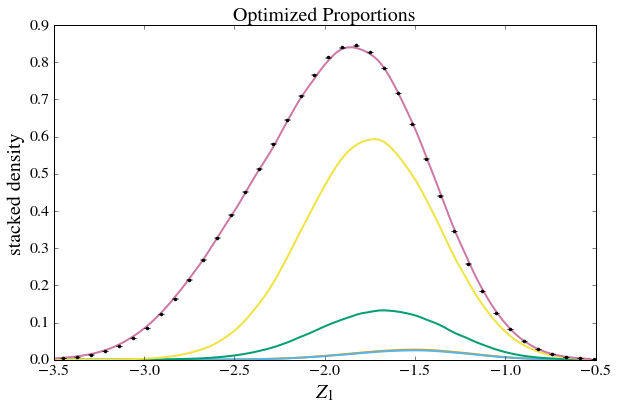

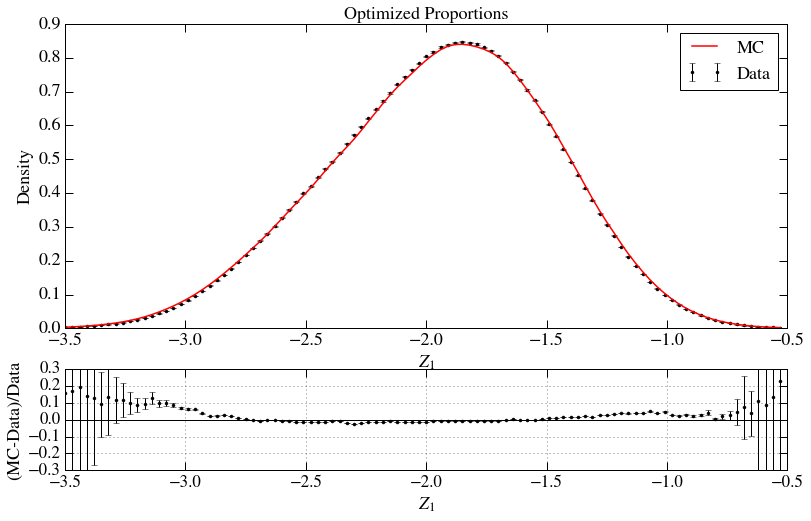

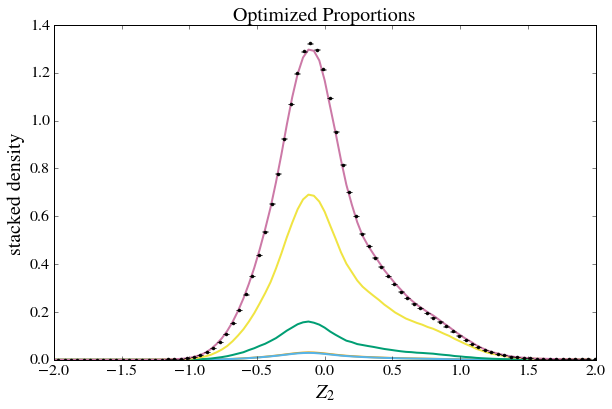

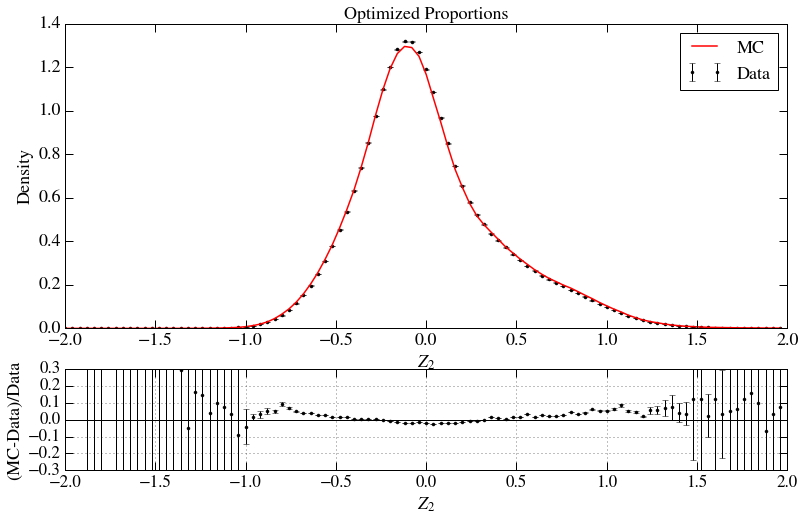

In [13]:
fig = plt.figure(figsize=(6*1.618,6))
ax = fig.add_subplot(1,1,1)
plot_densities(stack_x, stacked=True, prop=optimized_proportions, ax=ax, xlabel=r'$Z_1$', title='Optimized Proportions')
plot_data1d_histogram(test_data[:,0], weights=test_data[:,2], bins=100,normed=True, ax=ax, xlabel=r'$Z_1$', title='Optimized Proportions');
ax.set_xlim(z1_min, z1_max)
ax.set_ylim(0)
if save_fig: fig.savefig(optimized_stacked_x_fout)

plot_residuals(test_data[:,0], test_data[:,2], [z1_min,z1_max], stack_x, optimized_proportions, 'Optimized Proportions', r'$Z_1$', 'Data', 'Data_Z1_residuals.pdf')

    
fig = plt.figure(figsize=(6*1.618,6))
ax = fig.add_subplot(1,1,1)
plot_densities(stack_y, stacked=True, prop=optimized_proportions, ax=ax, xlabel=r'$Z_2$', title='Optimized Proportions')
plot_data1d_histogram(test_data[:,1], weights=test_data[:,2], bins=300,normed=True, ax=ax, xlabel=r'$Z_2$', title='Optimized Proportions');
ax.set_xlim(z2_min, z2_max)
ax.set_ylim(0)
if save_fig: fig.savefig(optimized_stacked_y_fout)
    
plot_residuals(test_data[:,1], test_data[:,2], [z2_min,z2_max], stack_y, optimized_proportions, 'Optimized Proportions', r'$Z_2$', 'Data', 'Data_Z2_residuals.pdf')

In [12]:
#if plot_truth_stack:
if False:
    fig = plt.figure(figsize=(6*1.618,6))
    ax = fig.add_subplot(1,1,1)
    plot_densities(stack_x, stacked=True, prop=true_proportions, ax=ax, xlabel=r'$Z_1$', title='True Proportions')
    plot_data1d_histogram(test_data[:,0], weights=test_data[:,2], bins=100,normed=True, ax=ax, xlabel=r'$Z_1$', title='True Proportions');
    ax.set_xlim(z1_min, z1_max)
    ax.set_ylim(0)
    if save_fig: fig.savefig(truth_stacked_x_fout)
        
    plot_residuals(test_data[:,0], test_data[:,2], [z1_min,z1_max], stack_x, true_proportions, r'$Z_1$', savefig=savefig_flag)
    
    step = (stack_y[1,0] - stack_y[0,0])/2.

    fig = plt.figure(figsize=(6*1.618,6))
    ax = fig.add_subplot(1,1,1)
    plot_densities(stack_y, stacked=True, prop=true_proportions, ax=ax, xlabel=r'$Z_2$', title='True Proportions')
    plot_data1d_histogram(test_data[:,1], weights=test_data[:,2], bins=300,normed=True, ax=ax, xlabel=r'$Z_2$', title='True Proportions');
    ax.set_xlim(z2_min, z2_max)
    ax.set_ylim(0)
    if save_fig: fig.savefig(truth_stacked_y_fout)
        
    plot_residuals(test_data[:,1], test_data[:,2], [z2_min,z2_max], stack_y, true_proportions, r'$Z_2$', savefig=savefig_flag)